In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

import os
import torch
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader, random_split
from torch import nn
from torchvision.transforms.functional import convert_image_dtype

In [2]:
class MyDataset(Dataset):
    def __init__(self, img_dir, transform):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = os.listdir(img_dir)
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels[idx])
        image = read_image(img_path)
        image = convert_image_dtype(image, torch.float32)
        return image

In [4]:
my_dataset = MyDataset("data_files/solar_images", transform=transform)
train_loader = DataLoader(my_dataset)

In [5]:
len(my_dataset)

40424

In [6]:
my_dataset[0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

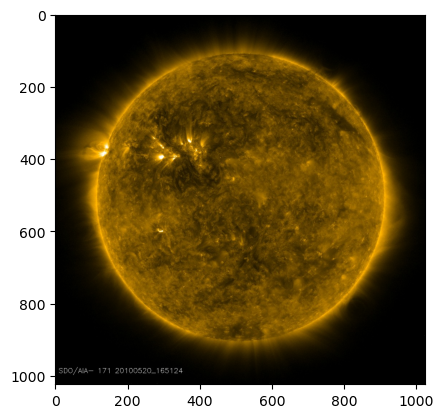

In [7]:
plt.imshow(my_dataset[0].permute(1, 2, 0))

In [8]:
# Split training data into training and validation data:
full_len = len(my_dataset)
train_data, val_data = random_split(my_dataset, [0.8, 0.2])
batch_size=256

In [9]:
# Create PyTorch dataloaders for data:
train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(val_data, batch_size=batch_size)